**Описание данных**

* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from plotly.offline import iplot, init_notebook_mode

In [ ]:
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


  №1  Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

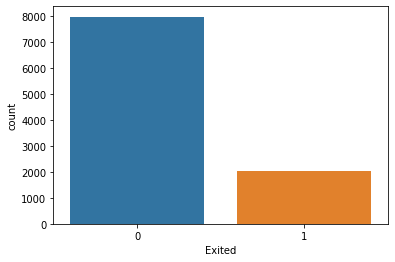

In [ ]:
sns.countplot(x='Exited', data=churn_data);

Вывод: Лояльных клиентов больше в 4 раза

№2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [ ]:
churn_data_balance = churn_data[churn_data.Balance > 2500]

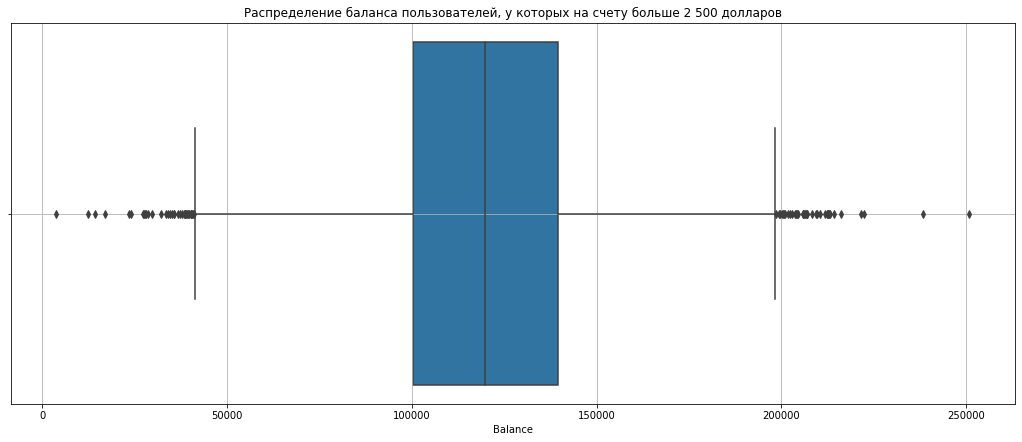

In [ ]:
fig = plt.figure(figsize=(18, 7))
boxplot = sns.boxplot(
    data=churn_data_balance,
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов');
boxplot.grid()

Вывод: Отсутствуют отрицательные значения, выбросы вполне нормальные, т.к. на счетах у людей могут быть суммы больше и меньше.

№3 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

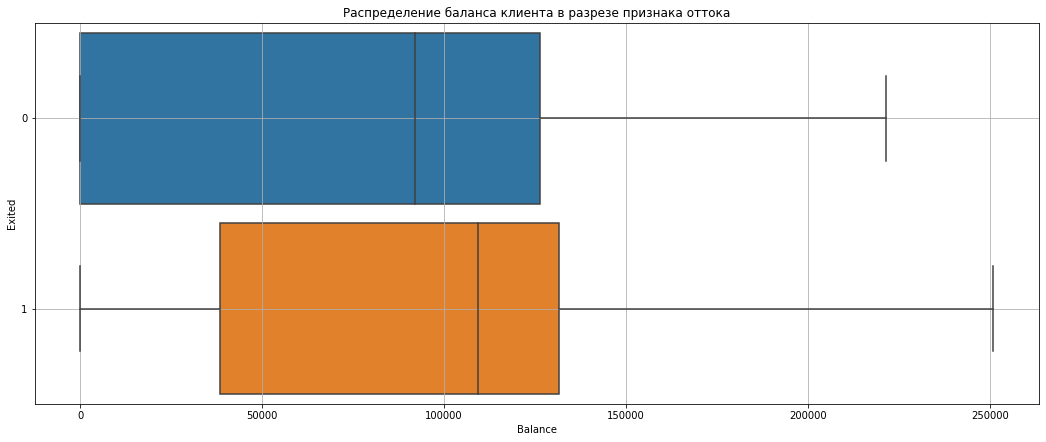

In [ ]:
fig = plt.figure(figsize=(18, 7))
boxplot = sns.boxplot(
    data=churn_data,
    x='Balance',
    y = "Exited",
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.grid()

Вывод: На основе значений медианы (ушедшие клиенты-110000, лояльные-80000) и максимумом на счетах ушедших >250000, можно предположить, что банк не удовлетворяет требованиям этих клиентов.

№4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

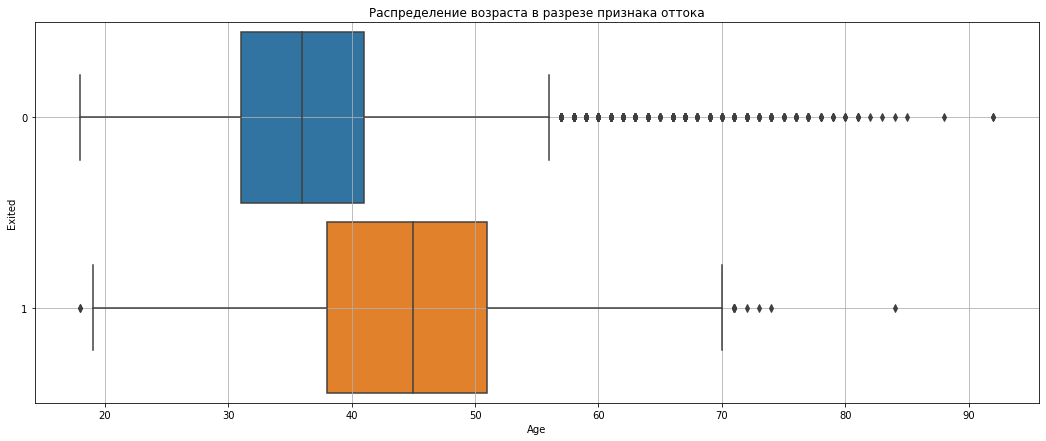

In [11]:
fig = plt.figure(figsize=(18, 7))
boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y = "Exited",
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.grid()

Вывод: Выбросов больше в группе лояльных клиентов, внимание направить на возрастную категорию 40-50 для минимизации клиентских потерь.

№5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

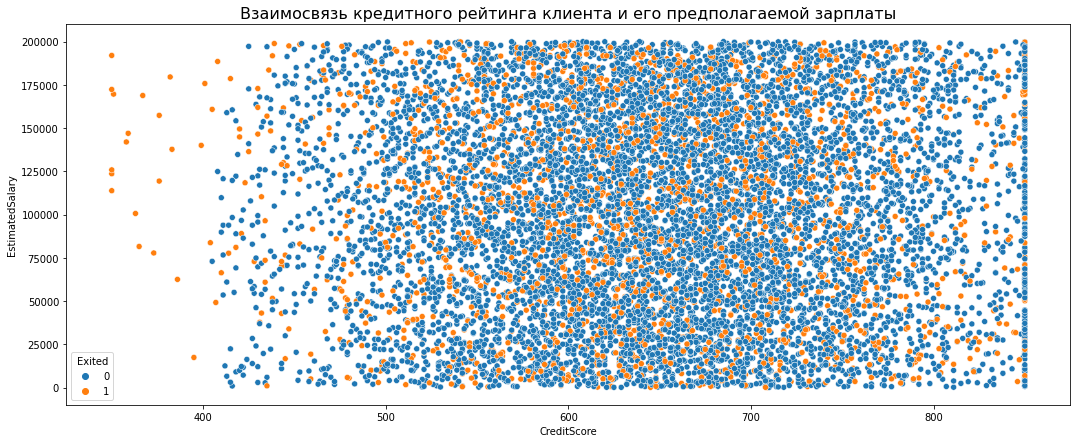

In [ ]:
fig = plt.figure(figsize=(18, 7))
score = sns.scatterplot(
    data=churn_data, 
    x="CreditScore",
    y="EstimatedSalary", 
    hue="Exited"
)
score.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize = 16);

Вывод: Взаимосвязи не видно, кредитный рейтинг присутствует и низкий и высокий

№6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

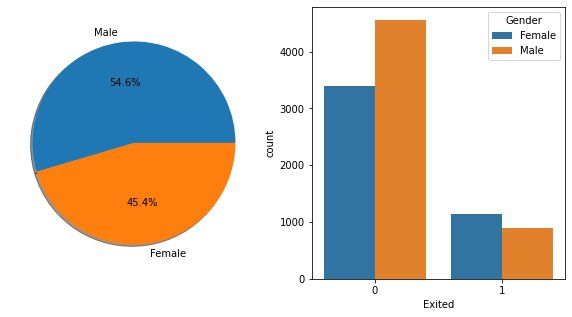

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
label = churn_data.Gender.value_counts().index
label_count = churn_data.Gender.value_counts().values

plt.pie(data=churn_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)

plt.subplot(1,2,2)
sns.countplot(x='Exited', data=churn_data ,hue='Gender');

Вывод: женщины уходят чаще

№7 Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [ ]:
churn_data_user = churn_data.groupby(['NumOfProducts','Exited']).agg({'Gender' : 'count'}).reset_index()

churn_data_user.columns = ['NumOfProducts','Exited','user_count']

churn_data_user['total_user'] = churn_data_user.groupby(['NumOfProducts'])['user_count'].transform('sum')

churn_data_user['Exited'] = churn_data_user['Exited'].apply(lambda x : 'Ушедший' if x == 1 else 'Лояльный')

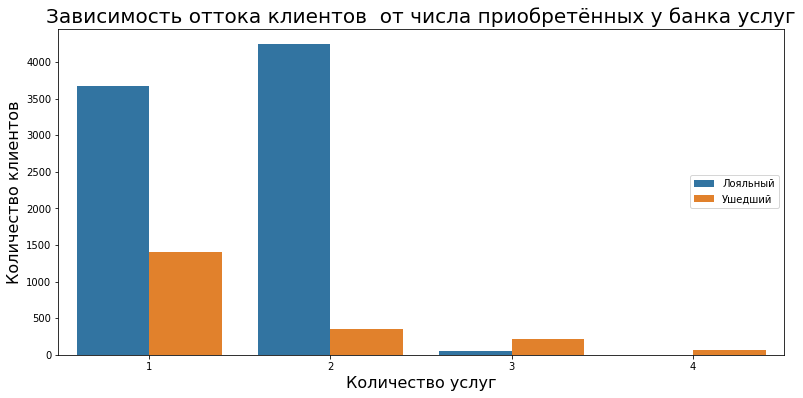

In [ ]:
plt.figure(figsize=(13, 6))
sns.barplot(data= churn_data_user, x = 'NumOfProducts', y ='user_count', hue='Exited')

plt.title('Зависимость оттока клиентов  от числа приобретённых у банка услуг', fontsize=20)

plt.xlabel('Количество услуг', fontsize = 16)
plt.ylabel('Количество клиентов', fontsize=16)

plt.legend(loc = 'center right');

Вывод: Большинство клиентов приобретают не более одной услуги

№8 Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [ ]:
churn_data_member = churn_data.groupby(['IsActiveMember','Exited']).agg({'Gender':'count'}).reset_index()
churn_data_member.columns = ['IsActiveMember','Exited','user_count']
churn_data_member['total_user'] = churn_data_member.groupby(['IsActiveMember'])['user_count'].transform('sum')
churn_data_member['IsActiveMember'] = churn_data_member['IsActiveMember'].apply(lambda x : 'Активный' \
                                                                                if x == 1 else 'Не активный')
churn_data_member['Exited'] = churn_data_member['Exited'].apply(lambda x : 'Ушедший' if x == 1 else 'Лояльный')

churn_data_member['Percentage'] = round(churn_data_member['user_count']/churn_data_member['total_user']*100,2)
churn_data_member['Percentage'] = churn_data_member['Percentage'].astype(str)
churn_data_member['Percentage'] = churn_data_member['Percentage']+'%'
churn_data_member

,IsActiveMember,Exited,user_count,total_user,Percentage
0,Не активный,Лояльный,3547,4849,73.15%
1,Не активный,Ушедший,1302,4849,26.85%
2,Активный,Лояльный,4416,5151,85.73%
3,Активный,Ушедший,735,5151,14.27%


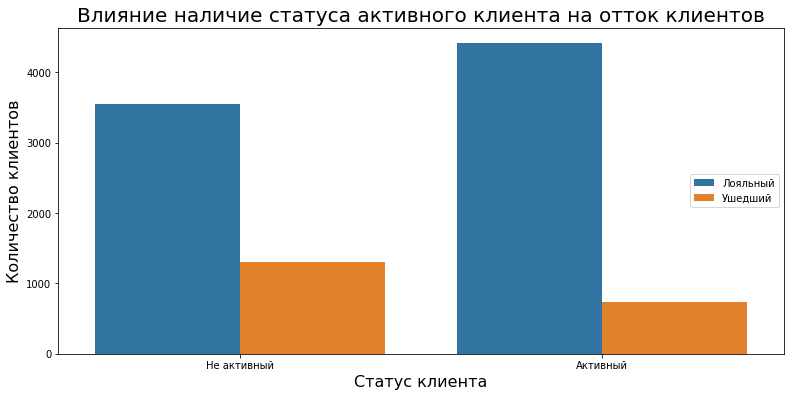

In [ ]:
plt.figure(figsize=(13, 6))
sns.barplot(data = churn_data_member, x = 'IsActiveMember', y ='user_count', hue='Exited')

plt.title('Влияние наличие статуса активного клиента на отток клиентов', fontsize=20)

plt.xlabel('Статус клиента', fontsize = 16)
plt.ylabel('Количество клиентов', fontsize=16)

plt.legend(loc = 'center right');

Вывод: Отток выше при статусе - не активный, возможно стоит пересмотреть качество оказанных услуг.

№9 В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
churn_data_country = churn_data.groupby(['Geography','Exited']).agg({'Gender':'count'}).reset_index()
churn_data_country.columns = ['Geography','Exited','user_count']
churn_data_country['total_user'] = churn_data_country.groupby(['Geography'])['user_count'].transform('sum')
churn_data_country['Exited'] = churn_data_country['Exited'].apply(lambda x : 'Ушедший' if x == 1 else 'Лояльный')
churn_data_country['Percentage'] = round(churn_data_country['user_count']/churn_data_country['total_user']*100,2)
churn_data_country['Percentage'] = churn_data_country['Percentage'].astype(str)
churn_data_country['Percentage'] = churn_data_country['Percentage']+'%'
churn_data_country

,Geography,Exited,user_count,total_user,Percentage
0,France,Лояльный,4204,5014,83.85%
1,France,Ушедший,810,5014,16.15%
2,Germany,Лояльный,1695,2509,67.56%
3,Germany,Ушедший,814,2509,32.44%
4,Spain,Лояльный,2064,2477,83.33%
5,Spain,Ушедший,413,2477,16.67%


In [ ]:
fig = px.choropleth(
    data_frame=churn_data_country, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Percentage", #от чего зависит цвет
    animation_frame="Exited", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

Вывод: процент ушедших клиентов выше всего в Германии.

№10 Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [ ]:
churn_data["CreditScoreCat"] = churn_data["CreditScore"].apply(get_credit_score_cat)

In [ ]:
churn_data_credit = churn_data.groupby(["CreditScoreCat", "Tenure", "Exited"]).agg({'Gender':'count'}).reset_index()
churn_data_credit.columns = ['CreditScoreCat',"Tenure", 'Exited','user_count']
churn_data_credit['total_user'] = churn_data_credit.groupby(['CreditScoreCat'])['user_count'].transform('sum')
churn_data_credit['Exited'] = churn_data_credit['Exited'].apply(lambda x : 'Ушедший' if x == 1 else 'Лояльный')

churn_data_credit['Percentage'] = round(churn_data_credit['user_count']/churn_data_credit['total_user']*100,2)

churn_data_credit = churn_data_credit[churn_data_credit.Exited == "Ушедший"]
churn_data_credit

,CreditScoreCat,Tenure,Exited,user_count,total_user,Percentage
1,Excellent,0,Ушедший,11,950,1.16
3,Excellent,1,Ушедший,20,950,2.11
5,Excellent,2,Ушедший,14,950,1.47
7,Excellent,3,Ушедший,17,950,1.79
9,Excellent,4,Ушедший,12,950,1.26
11,Excellent,5,Ушедший,21,950,2.21
13,Excellent,6,Ушедший,21,950,2.21
15,Excellent,7,Ушедший,12,950,1.26
17,Excellent,8,Ушедший,20,950,2.11
19,Excellent,9,Ушедший,26,950,2.74


In [ ]:
pivot = churn_data_credit.pivot_table(
    values='Percentage',
    columns='Tenure',
    index='CreditScoreCat',
)
pivot.columns = pivot.columns.astype('string')
pivot

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,1.16,2.11,1.47,1.79,1.26,2.21,2.21,1.26,2.11,2.74,1.37
Fair,0.88,2.06,2.15,2.19,1.89,2.10,2.28,1.97,2.24,1.84,1.01
Good,0.86,2.13,2.00,2.05,1.94,2.24,1.73,1.92,1.49,1.97,0.97
Poor,0.99,2.83,2.22,2.14,2.42,1.93,1.77,1.48,2.18,2.38,0.82
Very_Poor,1.27,2.69,1.58,2.85,2.69,1.58,2.53,2.06,2.85,2.22,1.42


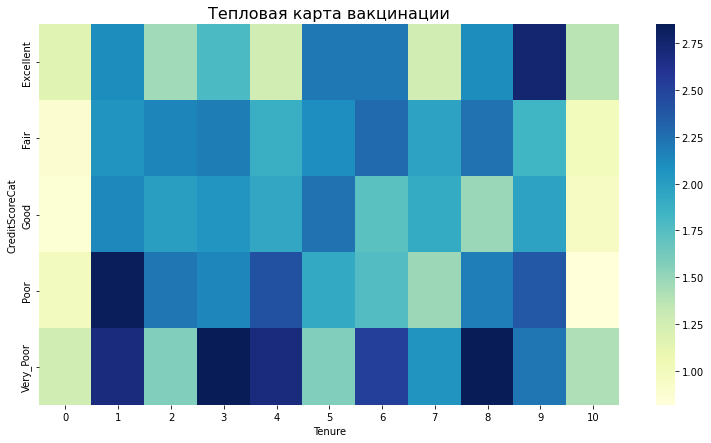

In [ ]:
fig = plt.figure(figsize=(13, 7))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

Вывод: Чаще всего уходят клиенты категории Very_Poor